<a href="https://colab.research.google.com/github/Nourelimanehed/ml_notebooks/blob/main/KNeighborsRegressor_Non_linear_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors Regressor - A non-linear problem

### Importing the relevant libraries

In [1]:
# This method will help us split the data into training and testing datasets
from sklearn.model_selection import train_test_split

# This class will help us create a KNN regression model
from sklearn.neighbors import KNeighborsRegressor

# This class will help us create a Linear regression model
from sklearn.linear_model import LinearRegression

# This method will help us calculate the mean squared error for each model
from sklearn.metrics import mean_squared_error

# This library will help us organize our data
import pandas as pd

# We import the sine function which will help us generate our non-linear data
from math import sin

# Import the numpy library
import numpy as np

# These libraries will help us visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

### Defining the regression

In [2]:
# Create a function that generates a random non-linear dataset
def non_linear_regression(n_samples, noise = 0, random_state = None):

    if random_state:
        np.random.seed(random_state)

    uni = lambda n : np.random.uniform(-2, 2, n)
    add_noise =  lambda  n : np.random.normal(0, 1, n)

    x = []
    x = uni(n_samples)
    x.sort()

    y_raw = [i**2 + sin(5*i) for i in x]
    y = y_raw + noise * np.std(y_raw) * add_noise(n_samples)

    return x, y

### Display the data with and without noise

In [3]:
# Generate data without noise
inputs_no_noise, target_no_noise = non_linear_regression(300, 0, 365)

# Using the same random state as above, generate the data with some noise
inputs, target = non_linear_regression(300, 0.5, 365)

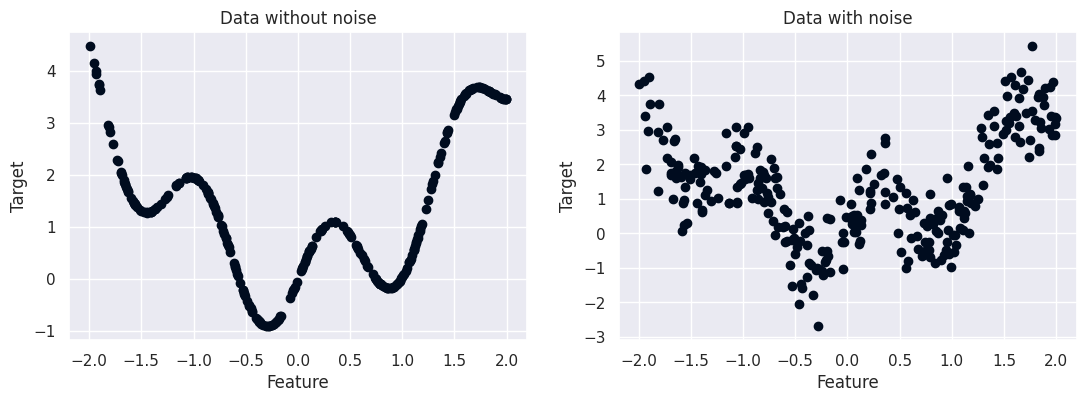

In [4]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for 2 subplots aligned horizontally
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

# Plot the noiseless data, choose the color of the datapoints
# Set a title and axes labels
ax1.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')
ax1.set_title('Data without noise')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot the noisy data, choose the color of the datapoints
# Set a title and axes labels
ax2.scatter(inputs, target, color = '#000C1F')
ax2.set_title('Data with noise')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

### Split the data into training and testing sets. Visualize both datasets

In [5]:
# Split the data into training and testing sets such that 20% of all points are dedicated to testing.
# Set a random state so that the split is reproducible.
x_train, x_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 365)

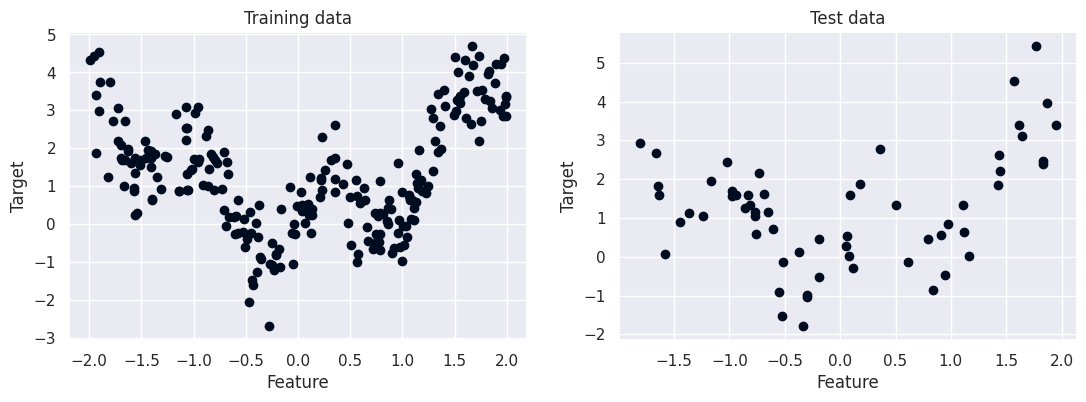

In [6]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for two subplots which are aligned horizontally. Set a specific size for the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

# Plot the training data
ax1.scatter(x_train, y_train, color = '#000C1F')
ax1.set_title('Training data')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot the test data
ax2.scatter(x_test, y_test, color = '#000C1F')
ax2.set_title('Test data')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

### Fit a linear regression and multiple KNN-regressions. Calculate the MSE

In [7]:
# Create an intance of the Linear regression class
reg_lin = LinearRegression()

# Fit the model to the training data.
# In sklearn, when fitting data with only 1 feature, the following reshaping should be applied.
reg_lin.fit(x_train.reshape(-1, 1), y_train)

# Make predictions on the test data.
# The same reshaping should be applied.
y_pred_lin = reg_lin.predict(x_test.reshape(-1, 1))

In [8]:
# Choose a maximum number of nearest neighbors and add 1.
# That is, choose the value 81 to set a maximum value of 80.
# The reason we add the 1 is because this number is then used in a range() function in the following way:
# range(1, k)
# The range() function includes the first number but excludes the second one.
k = 81

# Create an array where all mean-squared error (MSE) values from the linear regression will be stored.
mse_lin = []

# Calculate the MSE value for the linear regression
mse_lin = mean_squared_error(y_test, y_pred_lin)

# The MSE value calculated above is the same for all values of K.
# Therefore, we create an array storing that MSE value (k-1) many times.
# This will later be used to plot the MSE value versus the number of nearest neighbors.
mse_lin = [mse_lin]*(k-1)

# Create an array where all MSE values from the KNN regressions will be stored.
mse_knn = []

# Loop through all K-values
for i in range(1, k):

    # Create an instance of the KNN regression for the specified value of K
    reg_knn = KNeighborsRegressor(n_neighbors = i)

    # Fir the training data to the model
    reg_knn.fit(x_train.reshape(-1, 1), y_train)

    # Make predictions on the test data
    y_pred_knn = reg_knn.predict(x_test.reshape(-1, 1))

    # Calculate the MSE value for this regression and store it in the array
    mse_knn.append(mean_squared_error(y_test, y_pred_knn))

### Plot the MSE versus the number of neighbors

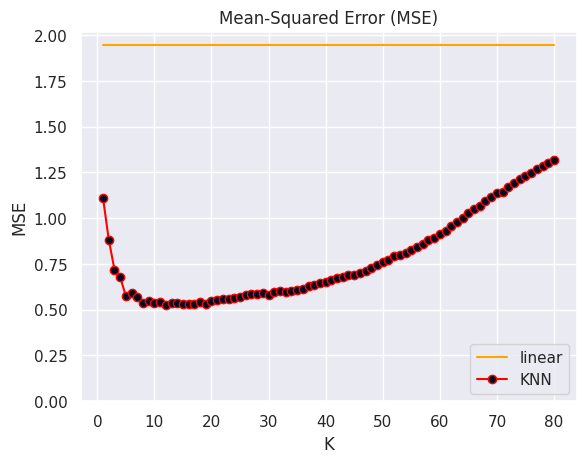

In [9]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for a figure
fig, ax = plt.subplots()

# Plot the MSE of the linear regression versus the value of K.
# Since the linear regression is not affected by the value of K, the output is a straight line.
# Choose a color.
# Choose a label which will describe the line in the legend
plt.plot(list(range(1, k)),
         mse_lin,
         color = 'orange',
         label = 'linear')

# Plot the MSE of the KNN regressions versus the value of K.
# Choose a color for the line.
# Use a marker to show the values of K.
# Choose a color for the marker
# Choose a label which will describe the line in the legend
plt.plot(list(range(1, k)),
         mse_knn,
         color = 'red',
         marker = 'o',
         markerfacecolor = '#000C1F',
         label = 'KNN')

# Place the legend in the lower right corner
ax.legend(loc='lower right')

# Set a title and axes labes
ax.set_title('Mean-Squared Error (MSE)')
ax.set_xlabel('K')
ax.set_ylabel('MSE')

# Set a minimum value of the y-axis
plt.ylim(0);

### Make predictions only for K = 1, 7, and 80

In [10]:
# Create a list to store the predictions from 3 KNN regressions
y_pred_knn = []

# Create 3 KNN regressions with K = 1, 7, and 80.
# Fit the model to the training data
# Make predictions on the test data
for i in [1, 7, 80]:
    reg_knn = KNeighborsRegressor(n_neighbors = i)
    reg_knn.fit(x_train.reshape(-1, 1), y_train)
    y_pred_knn.append(reg_knn.predict(x_test.reshape(-1, 1)))

### Sort the data according to the test features

In [11]:
# In order to visualize the regressions well, we need to sort the data with respect to the test features

df = pd.DataFrame(data = {'x_test':list(x_test.flatten()),
                          'y_test':list(y_test.flatten()),
                          'y_pred_lin':list(y_pred_lin.flatten()),
                          'y_pred_knn-1':list(y_pred_knn[0].flatten()),
                          'y_pred_knn-7':list(y_pred_knn[1].flatten()),
                          'y_pred_knn-80':list(y_pred_knn[2].flatten())})

# To check how the visualization looks like without sorting the data, comment out the line below,
# run the cell and then run the next 2 cells.
df = df.sort_values(by = ['x_test'])

x_test_sorted = df['x_test'].tolist()
y_test_sorted = df['y_test'].tolist()
y_pred_lin_sorted = df['y_pred_lin'].tolist()
y_pred_knn1_sorted = df['y_pred_knn-1'].tolist()
y_pred_knn7_sorted = df['y_pred_knn-7'].tolist()
y_pred_knn80_sorted = df['y_pred_knn-80'].tolist()

### Plot the regressions on top of the test data

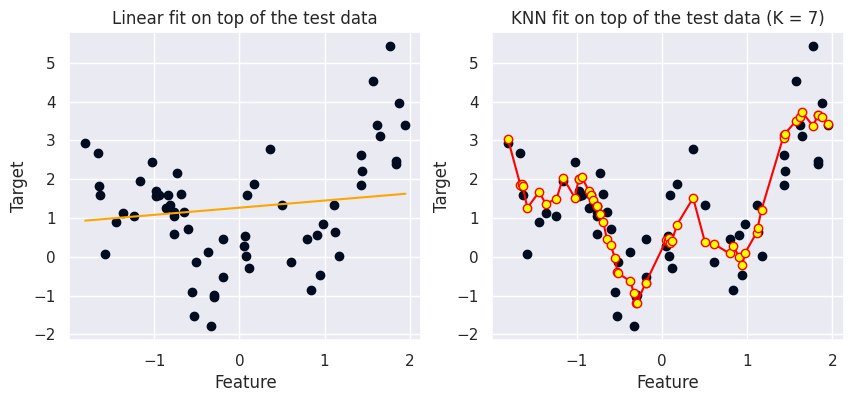

In [12]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for two figures aligned horizontally
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Plot the sorted test data on the left figure
ax1.scatter(x_test_sorted,
            y_test_sorted,
            color = '#000C1F')

# Plot the fit from the linear regression
ax1.plot(x_test_sorted,
         y_pred_lin_sorted,
         color = 'orange')

# Add a title and axes labels to the left figure
ax1.set_title('Linear fit on top of the test data')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot the sorted test data on the right figure
ax2.scatter(x_test_sorted,
            y_test_sorted,
            color = '#000C1F')

# Plot the fit from the KNN regression (K = 7)
ax2.plot(x_test_sorted,
         y_pred_knn7_sorted,
         color = 'red',
         marker = 'o',
         markerfacecolor = 'yellow')

# Add a title and axes labels to the left figure
ax2.set_title('KNN fit on top of the test data (K = 7)')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

### Plot the regressions for K = 1, 7, and 80 on top of the noiseless data

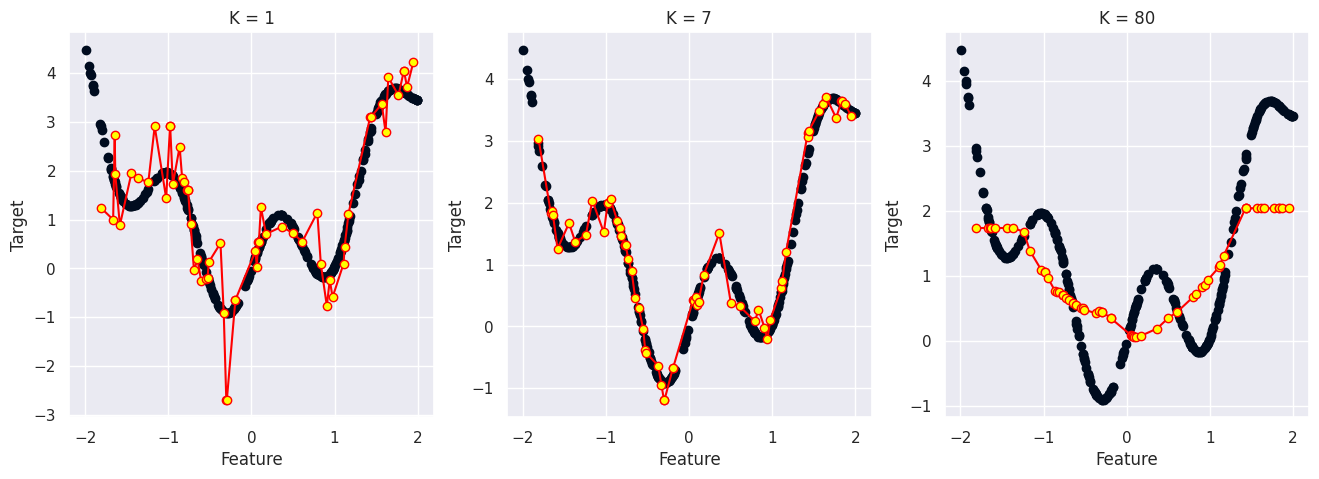

In [13]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for 3 figures aligned horizontally
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))

# Plot the noiseless data on all 3 figures
ax1.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')
ax2.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')
ax3.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')

# Plot the fit from a KNN regression (K = 1)
ax1.plot(x_test_sorted,
         y_pred_knn1_sorted,
         color = 'red',
         marker = 'o',
         markerfacecolor = 'yellow')
ax1.set_title('K = 1')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot the fit from a KNN regression (K = 7)
ax2.plot(x_test_sorted,
         y_pred_knn7_sorted,
         color = 'red',
         marker = 'o',
         markerfacecolor = 'yellow')
ax2.set_title('K = 7')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')

# Plot the fit from a KNN regression (K = 80)
ax3.plot(x_test_sorted,
         y_pred_knn80_sorted,
         color = 'red',
         marker = 'o',
         markerfacecolor = 'yellow')
ax3.set_title('K = 80')
ax3.set_xlabel('Feature')
ax3.set_ylabel('Target');